In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Data/Crop_recommendation.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [70]:
dataset.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [71]:
dataset.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [72]:
X = dataset.iloc[:,[0,6]].values

In [73]:
X

array([[ 90.       , 202.9355362],
       [ 85.       , 226.6555374],
       [ 60.       , 263.9642476],
       ...,
       [118.       , 173.3228386],
       [117.       , 127.1752928],
       [104.       , 140.9370415]])

In [74]:
Y=dataset.iloc[:,-1].values

In [75]:
Y

array(['rice', 'rice', 'rice', ..., 'coffee', 'coffee', 'coffee'],
      dtype=object)

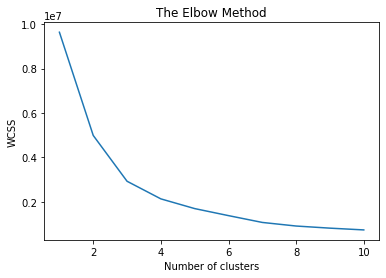

In [76]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

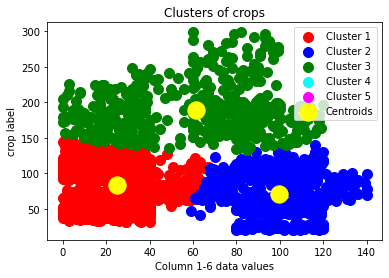

In [78]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of crops')
plt.xlabel('Column 1-6 data values')
plt.ylabel('crop label')
plt.legend()
plt.show()

In [79]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(y)

In [81]:
Y

array([20, 20, 20, ...,  5,  5,  5])

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [83]:
X_train

array([[ 27.        , 116.7036582 ],
       [ 81.        , 150.3166152 ],
       [ 90.        , 175.1742112 ],
       ...,
       [ 35.        ,  69.5274407 ],
       [ 39.        ,  41.02682925],
       [ 14.        , 112.5090516 ]])

In [84]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
X_train

array([[-0.64,  0.24],
       [ 0.81,  0.85],
       [ 1.06,  1.3 ],
       ...,
       [-0.43, -0.62],
       [-0.32, -1.13],
       [-1.  ,  0.16]])

In [91]:
Y_train

array([ 0,  8,  8, ...,  2, 10, 16])

In [92]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [94]:
Y_pred = classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[ 6 21]
 [21 21]
 [ 7  7]
 [ 3  3]
 [ 7  2]
 [17 20]
 [13 13]
 [19  9]
 [15 15]
 [ 1  1]
 [14 13]
 [ 8  5]
 [14 10]
 [10 14]
 [12 12]
 [ 0  0]
 [ 5  5]
 [14 10]
 [ 8  5]
 [12 12]
 [ 4  4]
 [ 2  2]
 [ 4  9]
 [ 8  8]
 [ 6  6]
 [ 5  5]
 [14 10]
 [12 16]
 [14 13]
 [ 9  9]
 [16 19]
 [20 20]
 [11 11]
 [15 15]
 [ 4  4]
 [ 6  6]
 [12 12]
 [12 12]
 [21 21]
 [ 2 13]
 [11 11]
 [ 2  2]
 [16 18]
 [21 21]
 [ 9 18]
 [14 14]
 [13  9]
 [ 9  9]
 [ 6  6]
 [14 14]
 [14 13]
 [ 7  2]
 [ 0  0]
 [15 15]
 [ 4 18]
 [ 1  1]
 [ 4 17]
 [12 12]
 [10 10]
 [ 6  6]
 [ 9 16]
 [14 14]
 [21 21]
 [20 20]
 [15 15]
 [ 0  0]
 [ 2  7]
 [ 5  5]
 [ 0  0]
 [16 16]
 [18  4]
 [ 0 19]
 [ 9  9]
 [ 1 11]
 [13  7]
 [10 13]
 [ 7  3]
 [11 11]
 [20  8]
 [12 12]
 [20 20]
 [ 7  2]
 [21 21]
 [21 21]
 [15 15]
 [ 6  6]
 [11 11]
 [10 10]
 [ 3 13]
 [11 17]
 [ 2  2]
 [ 8  8]
 [13 14]
 [ 7  7]
 [10 14]
 [11 11]
 [ 5  5]
 [ 5  8]
 [14 10]
 [12  3]
 [ 0 16]
 [ 8  8]
 [13 14]
 [ 6  1]
 [11  1]
 [20 20]
 [21 21]
 [ 5  5]
 [19 18]
 [15 15]
 [15 15]
 

In [95]:
Y_test

array([21, 21,  7,  3,  2, 20, 13,  9, 15,  1, 13,  5, 10, 14, 12,  0,  5,
       10,  5, 12,  4,  2,  9,  8,  6,  5, 10, 16, 13,  9, 19, 20, 11, 15,
        4,  6, 12, 12, 21, 13, 11,  2, 18, 21, 18, 14,  9,  9,  6, 14, 13,
        2,  0, 15, 18,  1, 17, 12, 10,  6, 16, 14, 21, 20, 15,  0,  7,  5,
        0, 16,  4, 19,  9, 11,  7, 13,  3, 11,  8, 12, 20,  2, 21, 21, 15,
        6, 11, 10, 13, 17,  2,  8, 14,  7, 14, 11,  5,  8, 10,  3, 16,  8,
       14,  1,  1, 20, 21,  5, 18, 15, 15, 12,  5,  7, 16, 19, 14, 10, 11,
        8, 19, 10, 16,  3,  3,  2, 19, 16,  3, 17, 13, 13, 15, 14, 11, 14,
        4, 19, 16,  2,  2,  7,  0,  5,  3,  0,  8, 12, 21, 17, 16,  4, 13,
        1, 19,  3, 21,  2,  0,  8, 10, 18,  8,  9,  9, 15, 20, 15,  1, 16,
       18,  0, 13,  4,  6, 14,  9, 19, 17, 16, 20, 17, 17, 18,  9,  1,  4,
       18, 20, 17, 11,  8, 13, 20, 11,  5, 18,  4,  3, 12,  4, 19, 11, 13,
       13, 16, 15, 11, 18,  1,  3,  2, 18, 16, 13, 14, 12, 17, 15, 19, 20,
       20,  2, 17,  2,  5

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  1  3  0  0]
 [ 0 13  0  0  0  0  4  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  1  0  0  0  4  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 14  0  0  0  2  0  0  0  0  2  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  3  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0 14  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  1  0  0  0 11  0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0 15  0  0  0  0  0  0  0  0  1  0  0  2  0]
 [ 2  0  0  2  2  0  0  1  0  4  0  0  1  2  0  0  0  0  2  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  0  2 10  0  0  0  0  0  0  0]
 [ 0  1  2  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  1  0  0  0  3  0  0  7  0  0  5  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4

0.5886363636363636